# Tarea 05 Medidas de Centralidad

La carpeta datos/GoT del repositorio de la clase incluye los datos de co-ocurrencia de los personajes de Game of Thrones de los 5 libros. Se considera co-ocurrencia si los nombres de los personajes aparecen con menos de 15 palabras de separación.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce


1. Obtener las medidas de centralidad para la red formada por la co-ocurrencia entre personajes, esto nos dará la 'importancia' de cada personaje. Realizar el cálculo para cada libro, con ello tendremos 5 valores por personaje para cada medida de centralidad

In [2]:
data1 = pd.read_csv("GoT/book1.csv")
data2 = pd.read_csv("GoT/book2.csv")
data3 = pd.read_csv("GoT/book3.csv")
data4 = pd.read_csv("GoT/book4.csv")
data5 = pd.read_csv("GoT/book5.csv")

In [3]:
df = pd.concat([data1,data2,data3,data4,data5])

In [4]:
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


In [5]:
tuplas = [tuple([x,y]) for x,y in zip(data1['Source'],data1['Target'])]

In [6]:
G = nx.DiGraph()

G.add_edges_from(tuplas)

print(len(G.nodes()))
print(len(G.edges()))

187
684


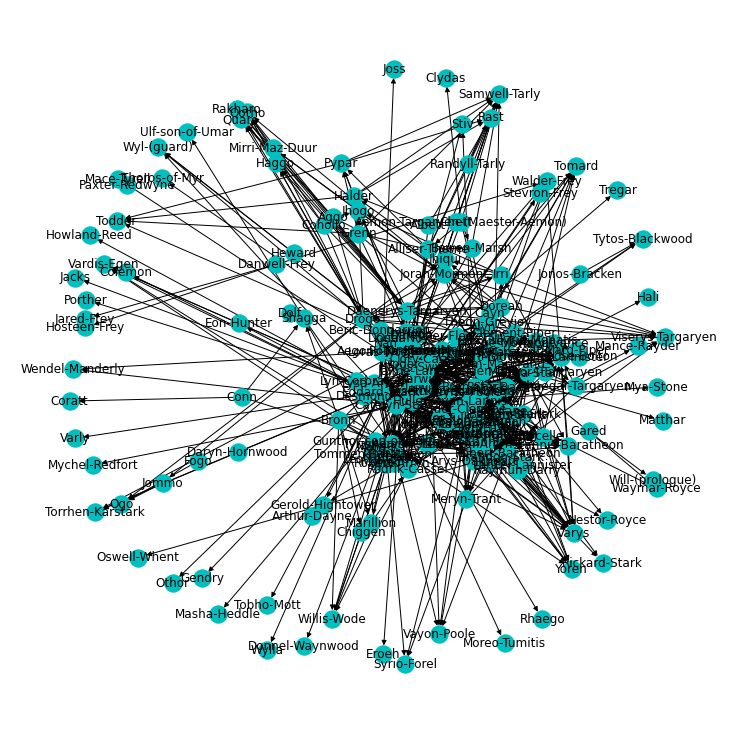

In [7]:
plt.figure(figsize=(10,10)) 
nx.draw(G,node_color='c',edge_color='k', with_labels=True)
plt.show()

In [8]:
central = nx.degree_centrality(G)
central['Addam-Marbrand']

0.010752688172043012

In [9]:
df_data_1 = pd.DataFrame.from_dict(central,orient='index',columns=['closeness_1']).reset_index()

In [10]:
tuplas = [tuple([x,y]) for x,y in zip(data1['Source'],data2['Target'])]
G = nx.DiGraph()

G.add_edges_from(tuplas)

print(len(G.nodes()))
print(len(G.edges()))

central = nx.degree_centrality(G)
df_data_2 = pd.DataFrame.from_dict(central,orient='index',columns=['closeness_2']).reset_index()

263
649


In [11]:
tuplas = [tuple([x,y]) for x,y in zip(data1['Source'],data3['Target'])]
G = nx.DiGraph()

G.add_edges_from(tuplas)

print(len(G.nodes()))
print(len(G.edges()))

central = nx.degree_centrality(G)
df_data_3 = pd.DataFrame.from_dict(central,orient='index',columns=['closeness_3']).reset_index()

271
656


In [12]:
tuplas = [tuple([x,y]) for x,y in zip(data1['Source'],data4['Target'])]
G = nx.DiGraph()

G.add_edges_from(tuplas)

print(len(G.nodes()))
print(len(G.edges()))

central = nx.degree_centrality(G)
df_data_4 = pd.DataFrame.from_dict(central,orient='index',columns=['closeness_4']).reset_index()

308
635


In [13]:
tuplas = [tuple([x,y]) for x,y in zip(data1['Source'],data5['Target'])]
G = nx.DiGraph()

G.add_edges_from(tuplas)

print(len(G.nodes()))
print(len(G.edges()))

central = nx.degree_centrality(G)
df_data_5 = pd.DataFrame.from_dict(central,orient='index',columns=['closeness_5']).reset_index()

316
649


In [14]:
data_frames = [df_data_1,df_data_2,df_data_3,df_data_4,df_data_5]

In [15]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,
                                            how='outer'), data_frames)

In [17]:
df_merged

,index,closeness_1,closeness_2,closeness_3,closeness_4,closeness_5
0,Addam-Marbrand,0.010753,0.007634,0.007407,0.006515,0.003175
1,Jaime-Lannister,0.155914,0.091603,0.122222,0.114007,0.063492
2,Tywin-Lannister,0.118280,0.041985,0.044444,0.048860,0.022222
3,Aegon-I-Targaryen,0.010753,0.007634,0.007407,0.006515,0.006349
4,Daenerys-Targaryen,0.112903,0.076336,0.088889,0.058632,0.082540
...,...,...,...,...,...,...
610,Richard-Horpe,NaN,NaN,NaN,NaN,0.003175
611,Rodrik-Sparr,NaN,NaN,NaN,NaN,0.003175
612,Yezzan-zo-Qaggaz,NaN,NaN,NaN,NaN,0.006349
613,Sweets,NaN,NaN,NaN,NaN,0.003175
